In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1640


<Axes: xlabel='Time'>

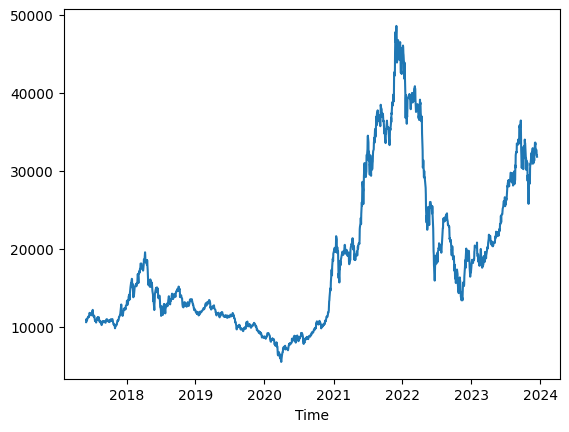

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [3]:
# Preprocessing
SSI['Lag'] = np.arange(len(SSI.index))
SSI = SSI[['Close', 'Lag']]
SSI

SSI = pd.DataFrame(SSI)
SSI.set_index("Lag", inplace= True)
SSI

,Close
Lag,
0,10570
1,10950
2,10740
3,10870
4,10980
...,...
1635,32700
1636,32600
1637,32000


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(SSI))
test_size = int(0.2 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[28439.47431559],
       [28456.59831284],
       [28473.72231009],
       [28490.84630734],
       [28507.97030459],
       [28525.09430184],
       [28542.21829909],
       [28559.34229633],
       [28576.46629358],
       [28593.59029083],
       [28610.71428808],
       [28627.83828533],
       [28644.96228258],
       [28662.08627982],
       [28679.21027707],
       [28696.33427432],
       [28713.45827157],
       [28730.58226882],
       [28747.70626607],
       [28764.83026332],
       [28781.95426056],
       [28799.07825781],
       [28816.20225506],
       [28833.32625231],
       [28850.45024956],
       [28867.57424681],
       [28884.69824406],
       [28901.8222413 ],
       [28918.94623855],
       [28936.0702358 ],
       [28953.19423305],
       [28970.3182303 ],
       [28987.44222755],
       [29004.56622479],
       [29021.69022204],
       [29038.81421929],
       [29055.93821654],
       [29073.06221379],
       [29090.18621104],
       [29107.31020829],


In [7]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[34056.1454131 ]
 [34073.26941035]
 [34090.3934076 ]
 [34107.51740485]
 [34124.6414021 ]
 [34141.76539935]
 [34158.88939659]
 [34176.01339384]
 [34193.13739109]
 [34210.26138834]
 [34227.38538559]
 [34244.50938284]
 [34261.63338009]
 [34278.75737733]
 [34295.88137458]
 [34313.00537183]
 [34330.12936908]
 [34347.25336633]
 [34364.37736358]
 [34381.50136083]
 [34398.62535807]
 [34415.74935532]
 [34432.87335257]
 [34449.99734982]
 [34467.12134707]
 [34484.24534432]
 [34501.36934156]
 [34518.49333881]
 [34535.61733606]
 [34552.74133331]
 [34569.86533056]
 [34586.98932781]
 [34604.11332506]
 [34621.2373223 ]
 [34638.36131955]
 [34655.4853168 ]
 [34672.60931405]
 [34689.7333113 ]
 [34706.85730855]
 [34723.9813058 ]
 [34741.10530304]
 [34758.22930029]
 [34775.35329754]
 [34792.47729479]
 [34809.60129204]
 [34826.72528929]
 [34843.84928653]
 [34860.97328378]
 [34878.09728103]
 [34895.22127828]
 [34912.34527553]
 [34929.46927278]
 [34946.59327003]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8940.790166751023
Testing MAPE: 40.02771543589611
Testing MAE: 7781.987242417835
MSLR:  0.14160083146993577


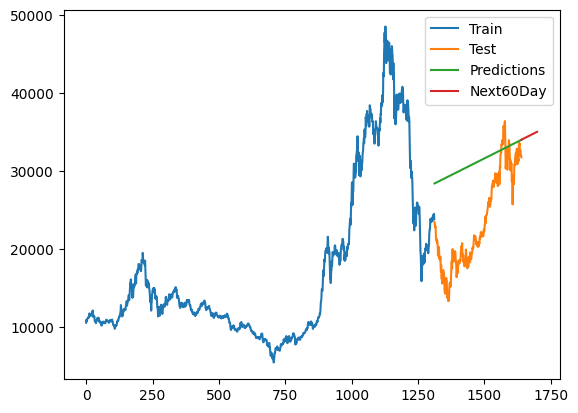

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()